In [127]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys, os
import numpy as np
import lumapi


In [128]:
emeApi = lumapi.MODE()

In [129]:
def achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(funcao, x, xmin, xmax):

    peak = max(funcao)
    index = np.where(funcao==peak)[0][0]
    x_maximo = x[index]

    y_maximo = funcao[index]
    if (x_maximo<=xmax and x_maximo>=xmin):
        return round(x_maximo,3),round(y_maximo,3)
    return None, None

In [130]:
emeApi.importmaterialdb('silicon_thermal.mdf')

In [131]:
um = 1e-6
nm = 1e-9

thickness = 0.22*um
thick_BOX = 2*um

W_bragg = 1530*nm

width = 0.5*um # Waveguide width
Delta_W = 20*nm # Corrugation width
W_great = width+ Delta_W
W_small = width - Delta_W

L_pd = 324*nm # Grating period
N_gt = 1 # Number of grating periods
L_gt = N_gt*L_pd # Grating length

W_ox = 3*um 
L_ex = 2*um # simulation size margins
L_total = L_gt+2*L_ex

material_Si ='silicon_thermal' #"Si (Silicon) - Palik"
material_BOX = "SiO2 (Glass) - Palik"

## Geometry

In [132]:
emeApi.deleteall()

#bragg grating
emeApi.addrect()
emeApi.set('x', -L_pd/4)
emeApi.set('x span', L_pd/2)
emeApi.set('y',0)
emeApi.set('y span', W_great)
emeApi.set('z',0)
emeApi.set('z span', thickness)
emeApi.set('material', material_Si)
emeApi.set('name', 'grt_big')

emeApi.addrect()
emeApi.set('x', L_pd/4)
emeApi.set('x span', L_pd/2)
emeApi.set('y',0)
emeApi.set('y span', W_small)
emeApi.set('z',0)
emeApi.set('z span', thickness)
emeApi.set('material', material_Si)
emeApi.set('name', 'grt_small')


In [133]:
emeApi.selectpartial('grt')
emeApi.addtogroup('grt_cell')
emeApi.select('grt_cell')
emeApi.selectpartial('grt_cell')
emeApi.addtogroup('bragg')

## Solver FDE

In [134]:
emeApi.switchtolayout()

emeApi.select('FDE')
emeApi.delete()

emeApi.addfde()
emeApi.set("simulation temperature", 298)
emeApi.set("background material", material_BOX)
emeApi.set("solver type", "2D X normal")
emeApi.set("y min bc", "Anti-Symmetric")
emeApi.set("y max bc", "Metal")
emeApi.set("z min bc", "Symmetric")
emeApi.set("y max bc", "Metal")
emeApi.set('x',-L_pd/4)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('y span', 3*width)
emeApi.set('z span', 3*thickness)

In [135]:
emeApi.select('mesh')
emeApi.delete()

emeApi.addmesh()
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('x span', L_pd)
emeApi.set('y span', 3*W_great)
emeApi.set('z span', 3*thickness)
emeApi.set("set mesh multiplier", 1)
emeApi.set('x mesh multiplier', 5)
emeApi.set('y mesh multiplier', 5)
emeApi.set('z mesh multiplier', 5)

In [136]:
emeApi.save("Bragg")

In [137]:
emeApi.switchtolayout()
emeApi.select("FDE")
emeApi.set("x", L_pd/4)
emeApi.findmodes()

group_index_high = np.abs(emeApi.getresult("FDE::data::mode1", "ng")[0][0])
neff_high = np.abs(emeApi.getresult("FDE::data::mode1", "neff")[0][0])
print("high index - ng = ", group_index_high," neff = ", neff_high)


emeApi.switchtolayout()
emeApi.select("FDE")
emeApi.set("x", -L_pd/4)
emeApi.findmodes()

group_index_low = np.abs(emeApi.getresult("FDE::data::mode1", "ng")[0][0])
neff_low = np.abs(emeApi.getresult("FDE::data::mode1", "neff")[0][0])
print("low index - ng = ", group_index_low," neff = ", neff_low)

high index - ng =  4.455372480362521  neff =  2.3905992783947387
low index - ng =  4.357813467947371  neff =  2.4567195569011644


## Bragg periodicity ($\Lambda$)

$$
\Lambda = \frac{\lambda_{Bragg}}{2n_{eff}}
$$

Where,

$$
n_{eff} = \frac{{n_{eff}}_1+{n_{eff}}_2}{2}
$$

In [138]:
Lambda = W_bragg/((neff_low+neff_high))
print("Lambda = ", Lambda*1e9, " nm")

Lambda =  315.6384079502379  nm


## Change geometry

In [139]:
# emeApi.switchtolayout()
# emeApi.deleteall()

# #bragg grating
# emeApi.addrect()
# emeApi.set('x', -Lambda/4)
# emeApi.set('x span', Lambda/2)
# emeApi.set('y',0)
# emeApi.set('y span', W_great)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'grt_big')

# emeApi.addrect()
# emeApi.set('x', Lambda/4)
# emeApi.set('x span', Lambda/2)
# emeApi.set('y',0)
# emeApi.set('y span', W_small)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'grt_small')

# emeApi.selectpartial('grt')
# emeApi.addtogroup('grt_cell')
# emeApi.select('grt_cell')
# emeApi.selectpartial('grt_cell')
# emeApi.addtogroup('bragg')

# emeApi.addrect()
# emeApi.set('x', Lambda)
# emeApi.set('x span', Lambda)
# emeApi.set('y',0)
# emeApi.set('y span', width)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'Phase')

# emeApi.select("bragg")
# emeApi.copy()
# emeApi.set("name", "bragg2")
# emeApi.set("x", 2*Lambda)
# emeApi.set("first axis",'z')
# emeApi.set("rotation 1",180)

## Solver EME Temperature

In [140]:
Temperatura = np.linspace(25,50,7)+273

w_box = 2*width
t_box = 2*um
nb = 10000
wvg = np.linspace(1500e-9, 1600e-9, nb)


In [141]:
emeApi.switchtolayout()
emeApi.select('EME')
emeApi.delete()

emeApi.addeme()
emeApi.set("simulation temperature", Temperatura[0])
emeApi.set("solver type", "3D: X prop")
emeApi.set("energy conservation", "conserve energy")
emeApi.set("background material", material_BOX)
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)

emeApi.set("x min", -Lambda/2)
emeApi.set('y span', w_box)
emeApi.set('z span', t_box)

emeApi.set("number of cell groups", 2)
emeApi.set("number of modes for all cell groups", 1)
emeApi.set("group spans" , np.array([Lambda/2, Lambda/2]))
emeApi.set("display cells",1)

emeApi.set("number of periodic groups", 1)
emeApi.set("start cell group", 1)
emeApi.set("end cell group", 2)
emeApi.set("periods", 120)

emeApi.set("wavelength", 1500*nm)

In [142]:
emeApi.select('mesh')
emeApi.delete()

emeApi.addmesh()
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('x span', Lambda)
emeApi.set('y span', w_box)
emeApi.set('z span', t_box)
emeApi.set("set mesh multiplier", 1)
emeApi.set('x mesh multiplier', 5)
emeApi.set('y mesh multiplier', 5)
emeApi.set('z mesh multiplier', 5)

In [143]:
Transmissao = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []

for i in range(len(Temperatura)):
    emeApi.switchtolayout()

    T = Temperatura[i]

    emeApi.select('EME')
    emeApi.set("simulation temperature", T)
    # emeApi.select('cladding')
    # emeApi.set('index', n_cladding*(1+eta1*(T-273)+eta2*(T-273)**2))
    # emeApi.select('low')
    # emeApi.set('index', n_low*(1+eta1*(T-273)+eta2*(T-273)**2))
    # emeApi.select('high')
    # emeApi.set('index', n_high*(1+eta1*(T-273)+eta2*(T-273)**2))
    emeApi.run()

    emeApi.setemeanalysis("wavelength sweep", 1)
    emeApi.setemeanalysis("start wavelength",wvg[0])
    emeApi.setemeanalysis("stop wavelength",wvg[-1])
    emeApi.setemeanalysis("number of wavelength points", nb)
    emeApi.emesweep("wavelength sweep")

    Resultado = emeApi.getemesweep("S_wavelength_sweep")
    
    Transmissao.append(np.abs(Resultado['s11'])**2)
    S11_modulo.append(np.abs(Resultado['s11']))
    S11_fase.append(np.angle(Resultado['s11']))
    S21_modulo.append(np.abs(Resultado['s21']))
    S21_fase.append(np.angle(Resultado['s21']))
    


In [144]:
S11 = np.zeros((len(wvg), 2*len(Temperatura)))
S21 = np.zeros((len(wvg), 2*len(Temperatura)))

for i in range(0,len(Temperatura),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [145]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(Temperatura)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(Temperatura)):
    filename = f"bragg_temperature_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{Temperatura[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


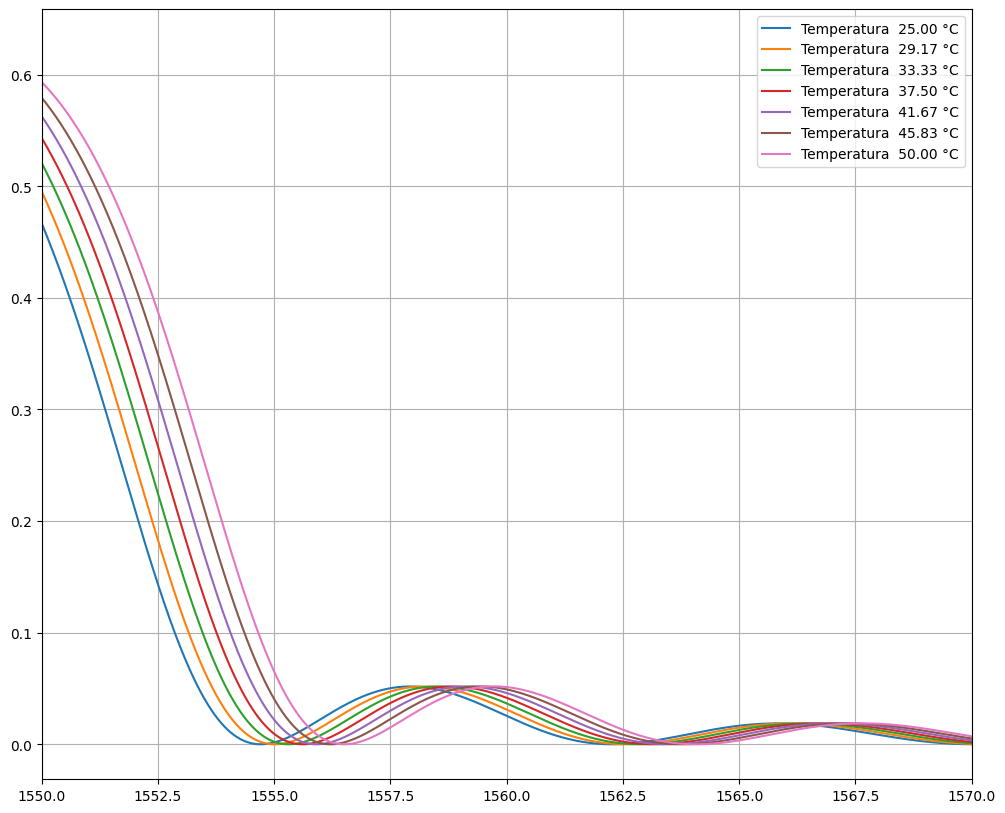

In [146]:
plt.figure(figsize=(12,10))
for i in range(len(Temperatura)):
    plt.plot(wvg*1e9,(Transmissao[i]), label = f'Temperatura {Temperatura[i] - 273 : .2f} °C')

plt.legend()
plt.xlim(1550, 1570)
plt.grid()
plt.show()


In [147]:
frequencia_onde_ocorre_maxima_transmissao = np.zeros(len(Temperatura))

for i in range(len(Temperatura)):
    x_max, y_max = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(Transmissao[i],wvg*1e9, 1550,1580)
    frequencia_onde_ocorre_maxima_transmissao[i] = (x_max)

C:\Users\gson5\AppData\Local\Temp\ipykernel_17468\2576494164.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


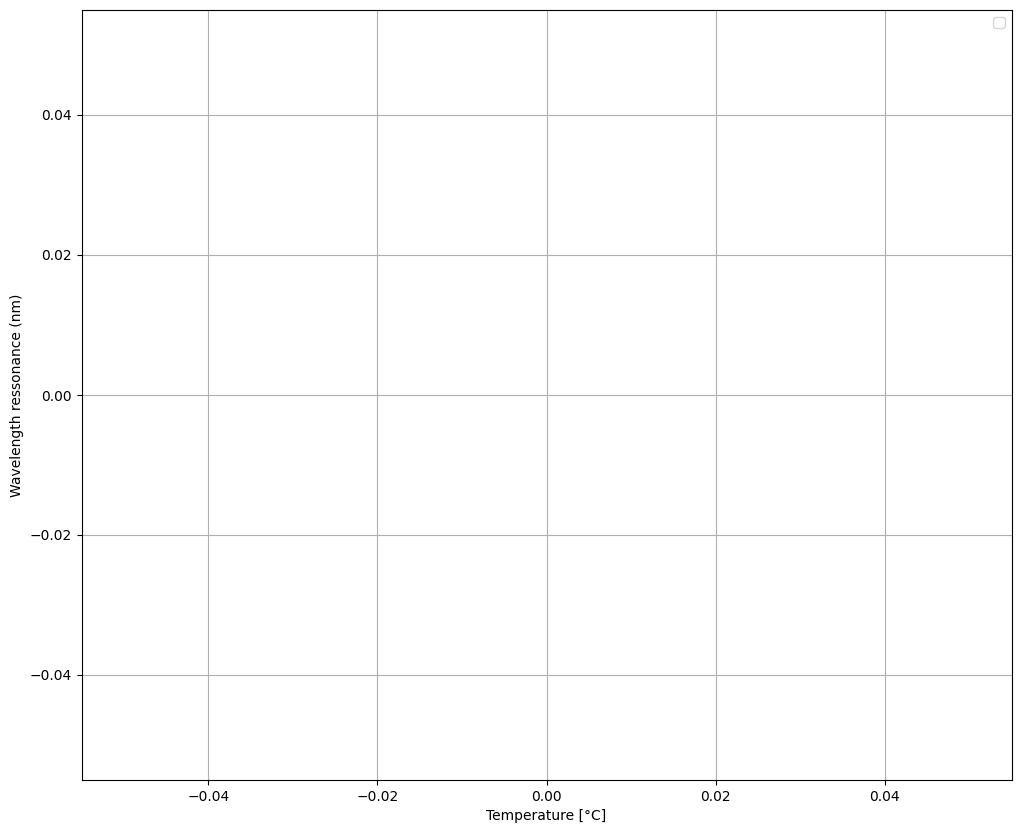

In [148]:
plt.figure(figsize=(12,10))
plt.plot(Temperatura-273,(frequencia_onde_ocorre_maxima_transmissao), '-o')
plt.ylabel("Wavelength ressonance (nm)")
plt.xlabel("Temperature [°C]")
plt.legend()
plt.grid()
plt.show()

## Strain

$$
l = l_0(1+S)
$$

Onde,

$$
S = [0,25,50,75,100,125,150] \text{ microstrain}
$$

In [163]:
S = np.linspace(0.001,0.03,10)
Lambda_strain = Lambda*(1+S)
print(Lambda_strain*1e9, "nm")
print(S*1e3," milistrain")

[315.95404636 316.97110345 317.98816054 319.00521764 320.02227473
 321.03933182 322.05638891 323.073446   324.0905031  325.10756019] nm
[ 1.          4.22222222  7.44444444 10.66666667 13.88888889 17.11111111
 20.33333333 23.55555556 26.77777778 30.        ]  milistrain


In [164]:
Transmissao = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []


for i in range(len(S)):
    
    emeApi.switchtolayout()
    emeApi.deleteall()

    #bragg grating
    emeApi.addrect()
    emeApi.set('x', -Lambda/4 * (1+S[i]))
    emeApi.set('x span', Lambda/2 * (1+S[i]))
    emeApi.set('y',0)
    emeApi.set('y span', W_great* (1+S[i]))
    emeApi.set('z',0)
    emeApi.set('z span', thickness * (1+S[i]))
    emeApi.set('material', material_Si)
    emeApi.set('name', 'grt_big')

    emeApi.addrect()
    emeApi.set('x', Lambda/4 * (1+S[i]))
    emeApi.set('x span', Lambda/2 * (1+S[i]))
    emeApi.set('y',0)
    emeApi.set('y span', W_small * (1+S[i]))
    emeApi.set('z',0)
    emeApi.set('z span', thickness* (1+S[i]))
    emeApi.set('material', material_Si)
    emeApi.set('name', 'grt_small')

    emeApi.addeme()
    emeApi.set("simulation temperature", 300)
    emeApi.set("solver type", "3D: X prop")
    emeApi.set("energy conservation", "conserve energy")
    emeApi.set("background material", material_BOX)
    emeApi.set("x", 0)
    emeApi.set('z', 0)
    emeApi.set('y', 0)

    emeApi.set("x min", -Lambda/2 * (1+S[i]))
    emeApi.set('y span', w_box * (1+S[i]))
    emeApi.set('z span', t_box * (1+S[i]))

    emeApi.set("number of cell groups", 2)
    emeApi.set("number of modes for all cell groups", 1)
    emeApi.set("group spans" , np.array([Lambda/2 * (1+S[i]), Lambda/2 * (1+S[i])]))
    emeApi.set("display cells",1)

    emeApi.set("number of periodic groups", 1)
    emeApi.set("start cell group", 1)
    emeApi.set("end cell group", 2)
    emeApi.set("periods", 175)

    emeApi.set("wavelength", 1500*nm)

    emeApi.addmesh()
    emeApi.set("x", 0)
    emeApi.set('z', 0)
    emeApi.set('y', 0)
    emeApi.set('x span', Lambda*(1+S[i]))
    emeApi.set('y span', w_box*(1+S[i]))
    emeApi.set('z span', t_box*(1+S[i]))
    emeApi.set("set mesh multiplier", 1)
    emeApi.set('x mesh multiplier', 5)
    emeApi.set('y mesh multiplier', 5)
    emeApi.set('z mesh multiplier', 5)

    emeApi.run()

    emeApi.setemeanalysis("wavelength sweep", 1)
    emeApi.setemeanalysis("start wavelength",wvg[0])
    emeApi.setemeanalysis("stop wavelength",wvg[-1])
    emeApi.setemeanalysis("number of wavelength points", nb)
    emeApi.emesweep("wavelength sweep")

    Resultado = emeApi.getemesweep("S_wavelength_sweep")
    
    Transmissao.append(np.abs(Resultado['s11'])**2)
    S11_modulo.append(np.abs(Resultado['s11']))
    S11_fase.append(np.angle(Resultado['s11']))
    S21_modulo.append(np.abs(Resultado['s21']))
    S21_fase.append(np.angle(Resultado['s21']))

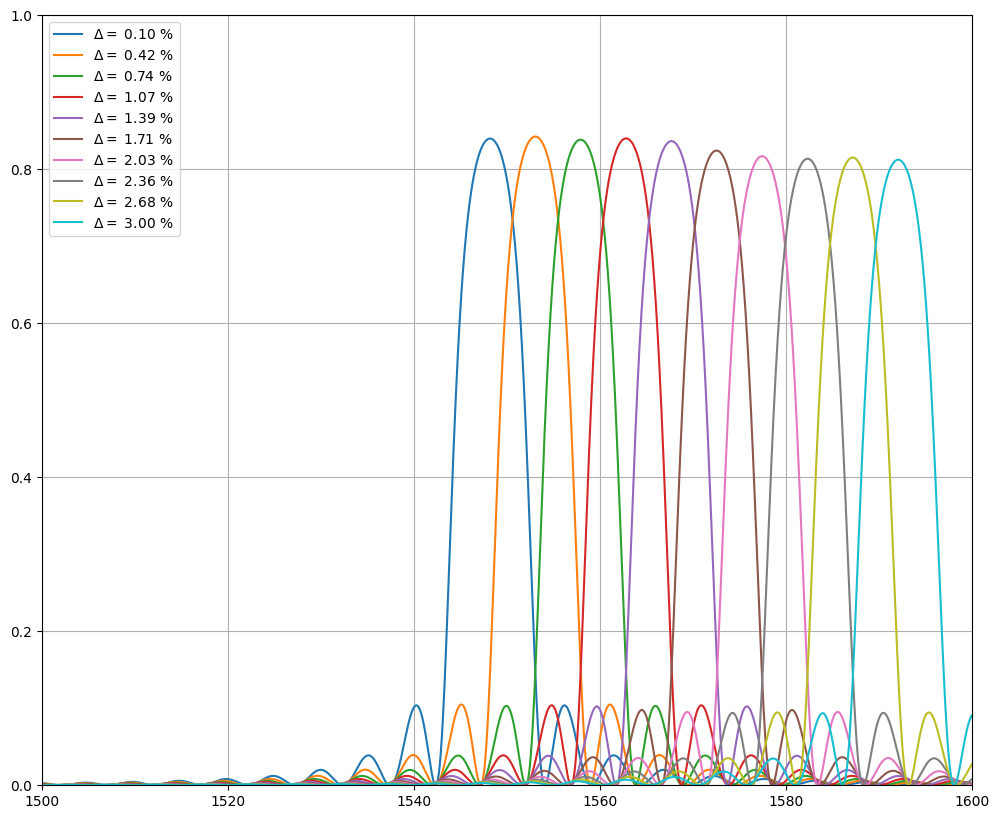

In [165]:
plt.figure(figsize=(12,10))
for i in range(len(S)):
    plt.plot(wvg*1e9,(Transmissao[i]), label = r'$\Delta = $'+f'{S[i] *100 : .2f} % ')

plt.legend()
plt.xlim(1500, 1600)
plt.ylim(0,1)
plt.grid()
plt.show()


In [166]:
frequencia_onde_ocorre_maxima_transmissao = np.zeros(len(S))

for i in range(len(S)):
    x_max, y_max = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(Transmissao[i],wvg*1e9, 1500,1600)
    frequencia_onde_ocorre_maxima_transmissao[i] = (x_max)

C:\Users\gson5\AppData\Local\Temp\ipykernel_17468\4043086092.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


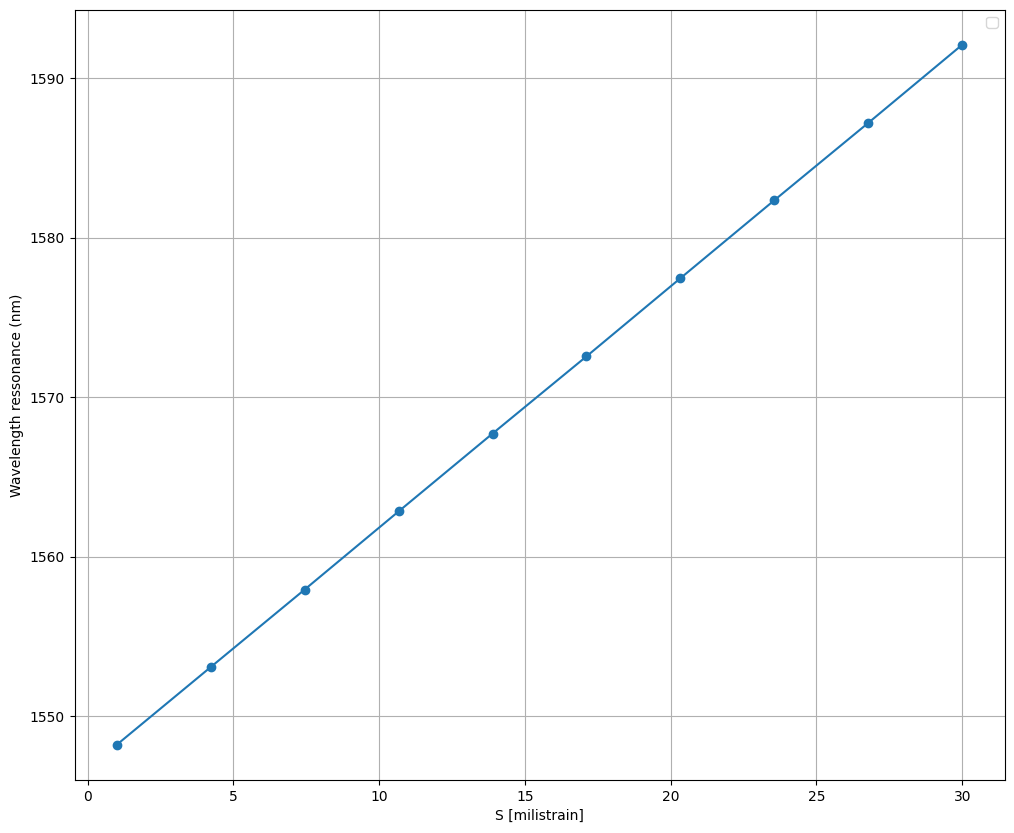

In [167]:
plt.figure(figsize=(12,10))
plt.plot(S*1e3,(frequencia_onde_ocorre_maxima_transmissao), '-o')
plt.ylabel("Wavelength ressonance (nm)")
plt.xlabel("S [milistrain]")
plt.legend()
plt.grid()
plt.show()

In [168]:
S11 = np.zeros((len(wvg), 2*len(S)))
S21 = np.zeros((len(wvg), 2*len(S)))

for i in range(0,len(S),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [169]:
print(S11[:,13])

[ 0.69054679  0.6841166   0.67768797 ... -0.36271898 -0.36852672
 -0.37433292]


In [170]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(S)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(S)):
    filename = f"bragg_strain_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{S[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


## Interconnect

In [171]:
inter = lumapi.INTERCONNECT()

## Create simulation ambience

In [172]:
comprimentos_de_onda = []
TE_gain_1 = []

for i in range(len(S)):
    inter.switchtolayout()
    inter.deleteall()

    inter.addelement("Optical Network Analyzer")
    inter.set("number of points",100000)
    inter.set("number of input ports",2)
    inter.set("input parameter",2)
    inter.set("start frequency", c/(1530e-9))
    inter.set("stop frequency", c/(1600e-9))

    inter.addelement("Optical N Port S-Parameter")
    inter.set("name","spars1")
    inter.set("load from file", True)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\SILICON BRAGG\bragg_strain_"+f"{i}.dat")

    inter.setposition("ONA_1", 0,0)
    inter.setposition("spars1", 0,200)

    inter.connect("ONA_1","output", "spars1", "port 1")
    inter.connect("ONA_1","input 1", "spars1", "port 2")
    inter.connect("ONA_1","input 2", "spars1", "port 1")

    inter.run()

    TE_gain_1.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["TE gain (dB)"]))

    comprimentos_de_onda.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength']))

(1500.0, 1600.0)

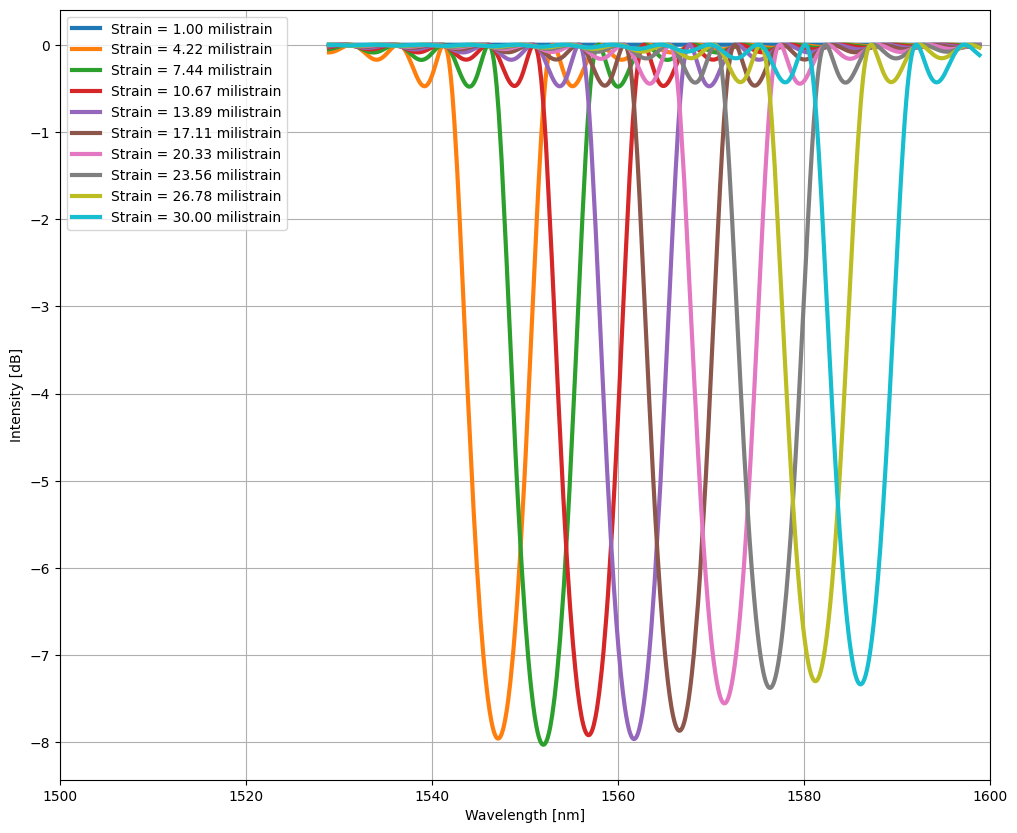

In [173]:
plt.figure(figsize=(12,10))
for i in range(len(S)):
    plt.plot(comprimentos_de_onda[i]*1e9,TE_gain_1[i],linewidth = 3,label = f"Strain = {S[i]*1e3:.2f} milistrain")
    
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [dB]')
plt.grid(True)
plt.legend()
plt.xlim(1500,1600)


In [174]:
print(frequencia_onde_ocorre_maxima_transmissao)

[1548.205 1553.075 1557.936 1562.836 1567.717 1572.557 1577.458 1582.348
 1587.199 1592.099]


In [175]:
pm1 = []
pm2 = []

for i in range(len(S)):
    inter.switchtolayout()
    inter.deleteall()

    inter.addelement("CW Laser")
    inter.set("name", "fonte1")
    inter.set("frequency", 3e8/(1e-9*1560))

    inter.addelement("CW Laser")
    inter.set("name", "fonte2")
    inter.set("frequency", 3e8/(1562*1e-9))

    inter.addelement("Optical Combiner")
    inter.set("name", "optC1")

    inter.addelement("Optical Combiner")
    inter.set("configuration", "splitter")
    inter.set("name", "optS1")
    inter.rotateelement("optS1")
    inter.rotateelement("optS1")

    inter.addelement("Optical N Port S-Parameter")
    inter.set("name","spars1")
    inter.set("load from file", True)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\SILICON BRAGG\bragg_strain_"+f"{i+1}.dat")

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter1")
    inter.set("frequency", 3e8/1560e-9)

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter2")
    inter.set("frequency", 3e8/1562e-9)

    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec1")
    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec2")

    inter.addelement("Power Meter")
    inter.set("name", "PM1")
    inter.addelement("Power Meter")
    inter.set("name","PM2")

    inter.setposition("fonte1", 0,0)
    inter.setposition("fonte1", 0,200)

    inter.setposition("optC1", 200,100)
    inter.setposition("spars1", 400,100)
    inter.setposition("optS1", 600,100)

    inter.setposition("filter1", 800,0)
    inter.setposition("filter2", 800,200)

    inter.setposition("photodec1", 1000,0)
    inter.setposition("photodec2", 1000,200)

    inter.setposition("PM1", 1200,0)
    inter.setposition("PM2", 1200,200)

    inter.connect("fonte2", "output", "optC1", "input 1")
    inter.connect("fonte1", "output", "optC1", "input 2")

    inter.connect("optC1", "output", "spars1", "port 1")
    inter.connect("spars1", "port 2", "optS1", "input")

    inter.connect("filter1", "input", "optS1", "output 2")
    inter.connect("filter2", "input", "optS1", "output 1")

    inter.connect("photodec1", "input", "filter1", "output")
    inter.connect("photodec2", "input", "filter2", "output")

    inter.connect("PM1", "input", "photodec1", "output")
    inter.connect("PM2", "input", "photodec2", "output")

    inter.run()

    pm1.append(inter.getresult("PM1","total power"))
    pm2.append(inter.getresult("PM2","total power"))

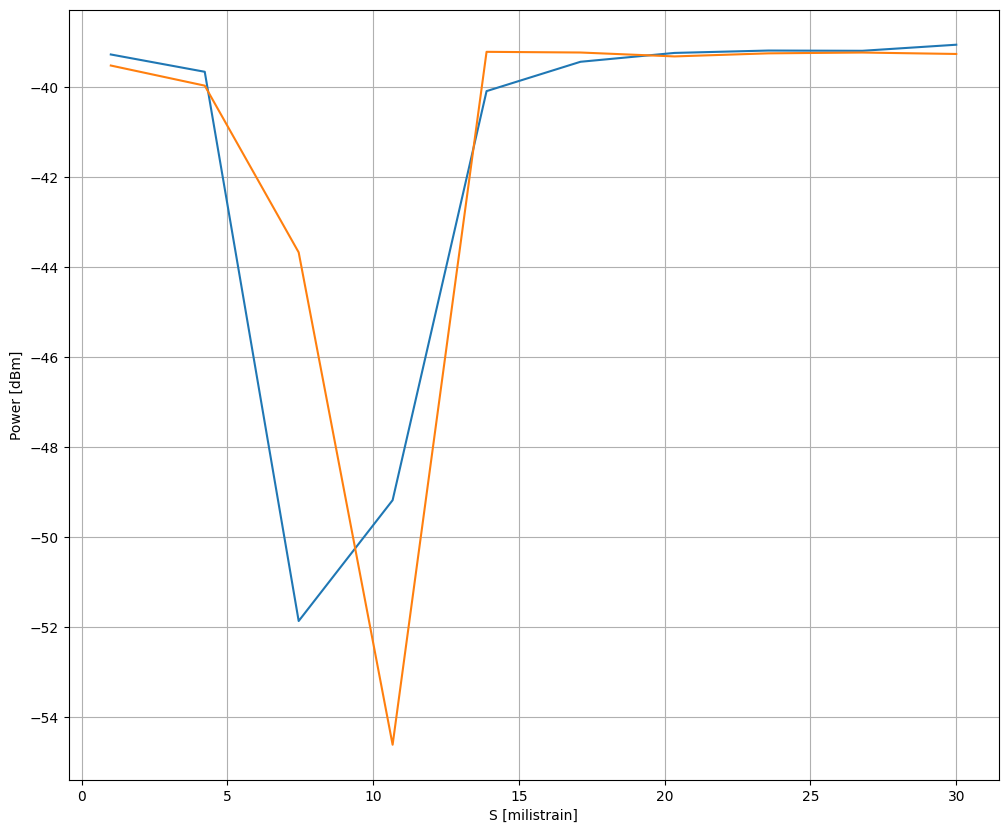

In [176]:
plt.figure(figsize=(12,10))
plt.plot(S*1e3,pm1)
plt.plot(S*1e3,pm2)
plt.ylabel("Power [dBm]")
plt.xlabel("S [milistrain]")
plt.grid()